In [2]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

In [4]:
df=pd.read_csv("Melbourne_housing_FULL.csv")
df_copy=df.copy()
df_copy.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [5]:
df


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.00,PI,Jas,24/02/2018,6.30,3013.00,4.00,1.00,3.00,593.00,NaN,NaN,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00
34853,Yarraville,29A Murray St,2,h,888000.00,SP,Sweeney,24/02/2018,6.30,3013.00,2.00,2.00,1.00,98.00,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00
34854,Yarraville,147A Severn St,2,t,705000.00,S,Jas,24/02/2018,6.30,3013.00,2.00,1.00,2.00,220.00,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00
34855,Yarraville,12/37 Stephen St,3,h,1140000.00,SP,hockingstuart,24/02/2018,6.30,3013.00,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

<Axes: >

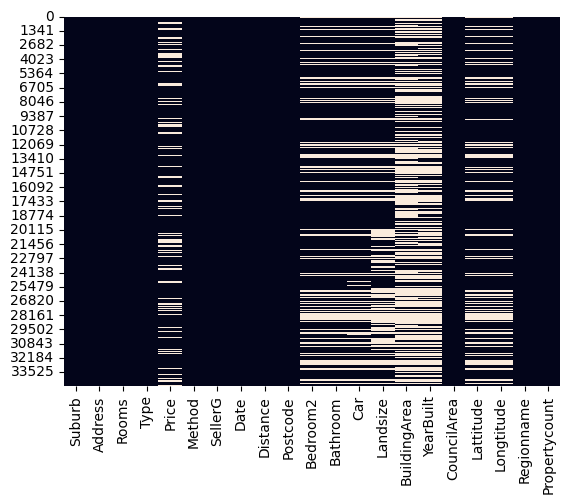

In [7]:
sns.heatmap(df.isnull(),cbar=False)

# **`EDA`**



In [8]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [9]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [10]:
df_copy.duplicated().sum()

1

In [11]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00


In [12]:
df_copy.drop_duplicates()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.00,PI,Jas,24/02/2018,6.30,3013.00,4.00,1.00,3.00,593.00,NaN,NaN,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00
34853,Yarraville,29A Murray St,2,h,888000.00,SP,Sweeney,24/02/2018,6.30,3013.00,2.00,2.00,1.00,98.00,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00
34854,Yarraville,147A Severn St,2,t,705000.00,S,Jas,24/02/2018,6.30,3013.00,2.00,1.00,2.00,220.00,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00
34855,Yarraville,12/37 Stephen St,3,h,1140000.00,SP,hockingstuart,24/02/2018,6.30,3013.00,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.00


In [44]:
descriptive_stats = df.describe(include='all')
print(descriptive_stats)

           Suburb       Address    Rooms   Type       Price Method SellerG        Date  Distance  Postcode  Bedroom2  Bathroom      Car  Landsize  BuildingArea  YearBuilt              CouncilArea  Lattitude  Longtitude             Regionname  Propertycount
count       34857         34857 34857.00  34857    27247.00  34857   34857       34857  34856.00  34856.00  26640.00  26631.00 26129.00  23047.00      13742.00   15551.00                    34854   26881.00    26881.00                  34854       34854.00
unique        351         34009      NaN      3         NaN      9     388          78       NaN       NaN       NaN       NaN      NaN       NaN           NaN        NaN                       33        NaN         NaN                      8            NaN
top     Reservoir  5 Charles St      NaN      h         NaN      S  Jellis  28/10/2017       NaN       NaN       NaN       NaN      NaN       NaN           NaN        NaN  Boroondara City Council        NaN         NaN  Southern 

In [43]:
descriptive_stats = df.describe(include='all')


object_columns = df.select_dtypes(include='object').columns

for column in object_columns:
    df[column] = df[column].astype('category')

categorical_stats = df.describe(include='all')
print(categorical_stats)



           Suburb       Address    Rooms   Type       Price Method SellerG        Date  Distance  Postcode  Bedroom2  Bathroom      Car  Landsize  BuildingArea  YearBuilt              CouncilArea  Lattitude  Longtitude             Regionname  Propertycount
count       34857         34857 34857.00  34857    27247.00  34857   34857       34857  34856.00  34856.00  26640.00  26631.00 26129.00  23047.00      13742.00   15551.00                    34854   26881.00    26881.00                  34854       34854.00
unique        351         34009      NaN      3         NaN      9     388          78       NaN       NaN       NaN       NaN      NaN       NaN           NaN        NaN                       33        NaN         NaN                      8            NaN
top     Reservoir  5 Charles St      NaN      h         NaN      S  Jellis  28/10/2017       NaN       NaN       NaN       NaN      NaN       NaN           NaN        NaN  Boroondara City Council        NaN         NaN  Southern 

In [45]:
z_scores = np.abs(stats.zscore(df_copy[[]]))


threshold = 3


outliers = (z_scores > threshold).any(axis=1)


df_no_outliers = df[~outliers]

In [46]:
df_no_outliers

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.00,PI,Jas,24/02/2018,6.30,3013.00,4.00,1.00,3.00,593.00,NaN,NaN,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00
34853,Yarraville,29A Murray St,2,h,888000.00,SP,Sweeney,24/02/2018,6.30,3013.00,2.00,2.00,1.00,98.00,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00
34854,Yarraville,147A Severn St,2,t,705000.00,S,Jas,24/02/2018,6.30,3013.00,2.00,1.00,2.00,220.00,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00
34855,Yarraville,12/37 Stephen St,3,h,1140000.00,SP,hockingstuart,24/02/2018,6.30,3013.00,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.00


In [47]:
categorical_columns_with_missing_values = []


for column in categorical_columns_with_missing_values:
    df_copy[column].fillna(df_copy[column].mode().iloc[0], inplace=True)

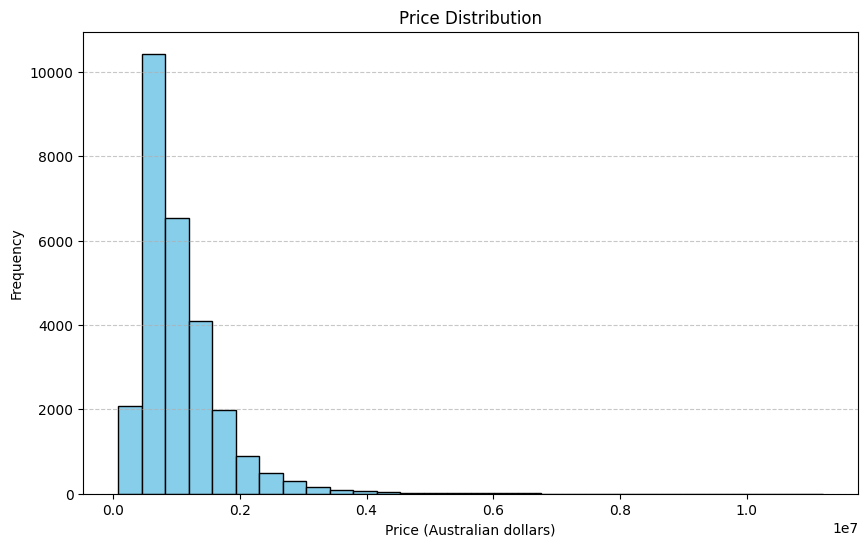

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (Australian dollars)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

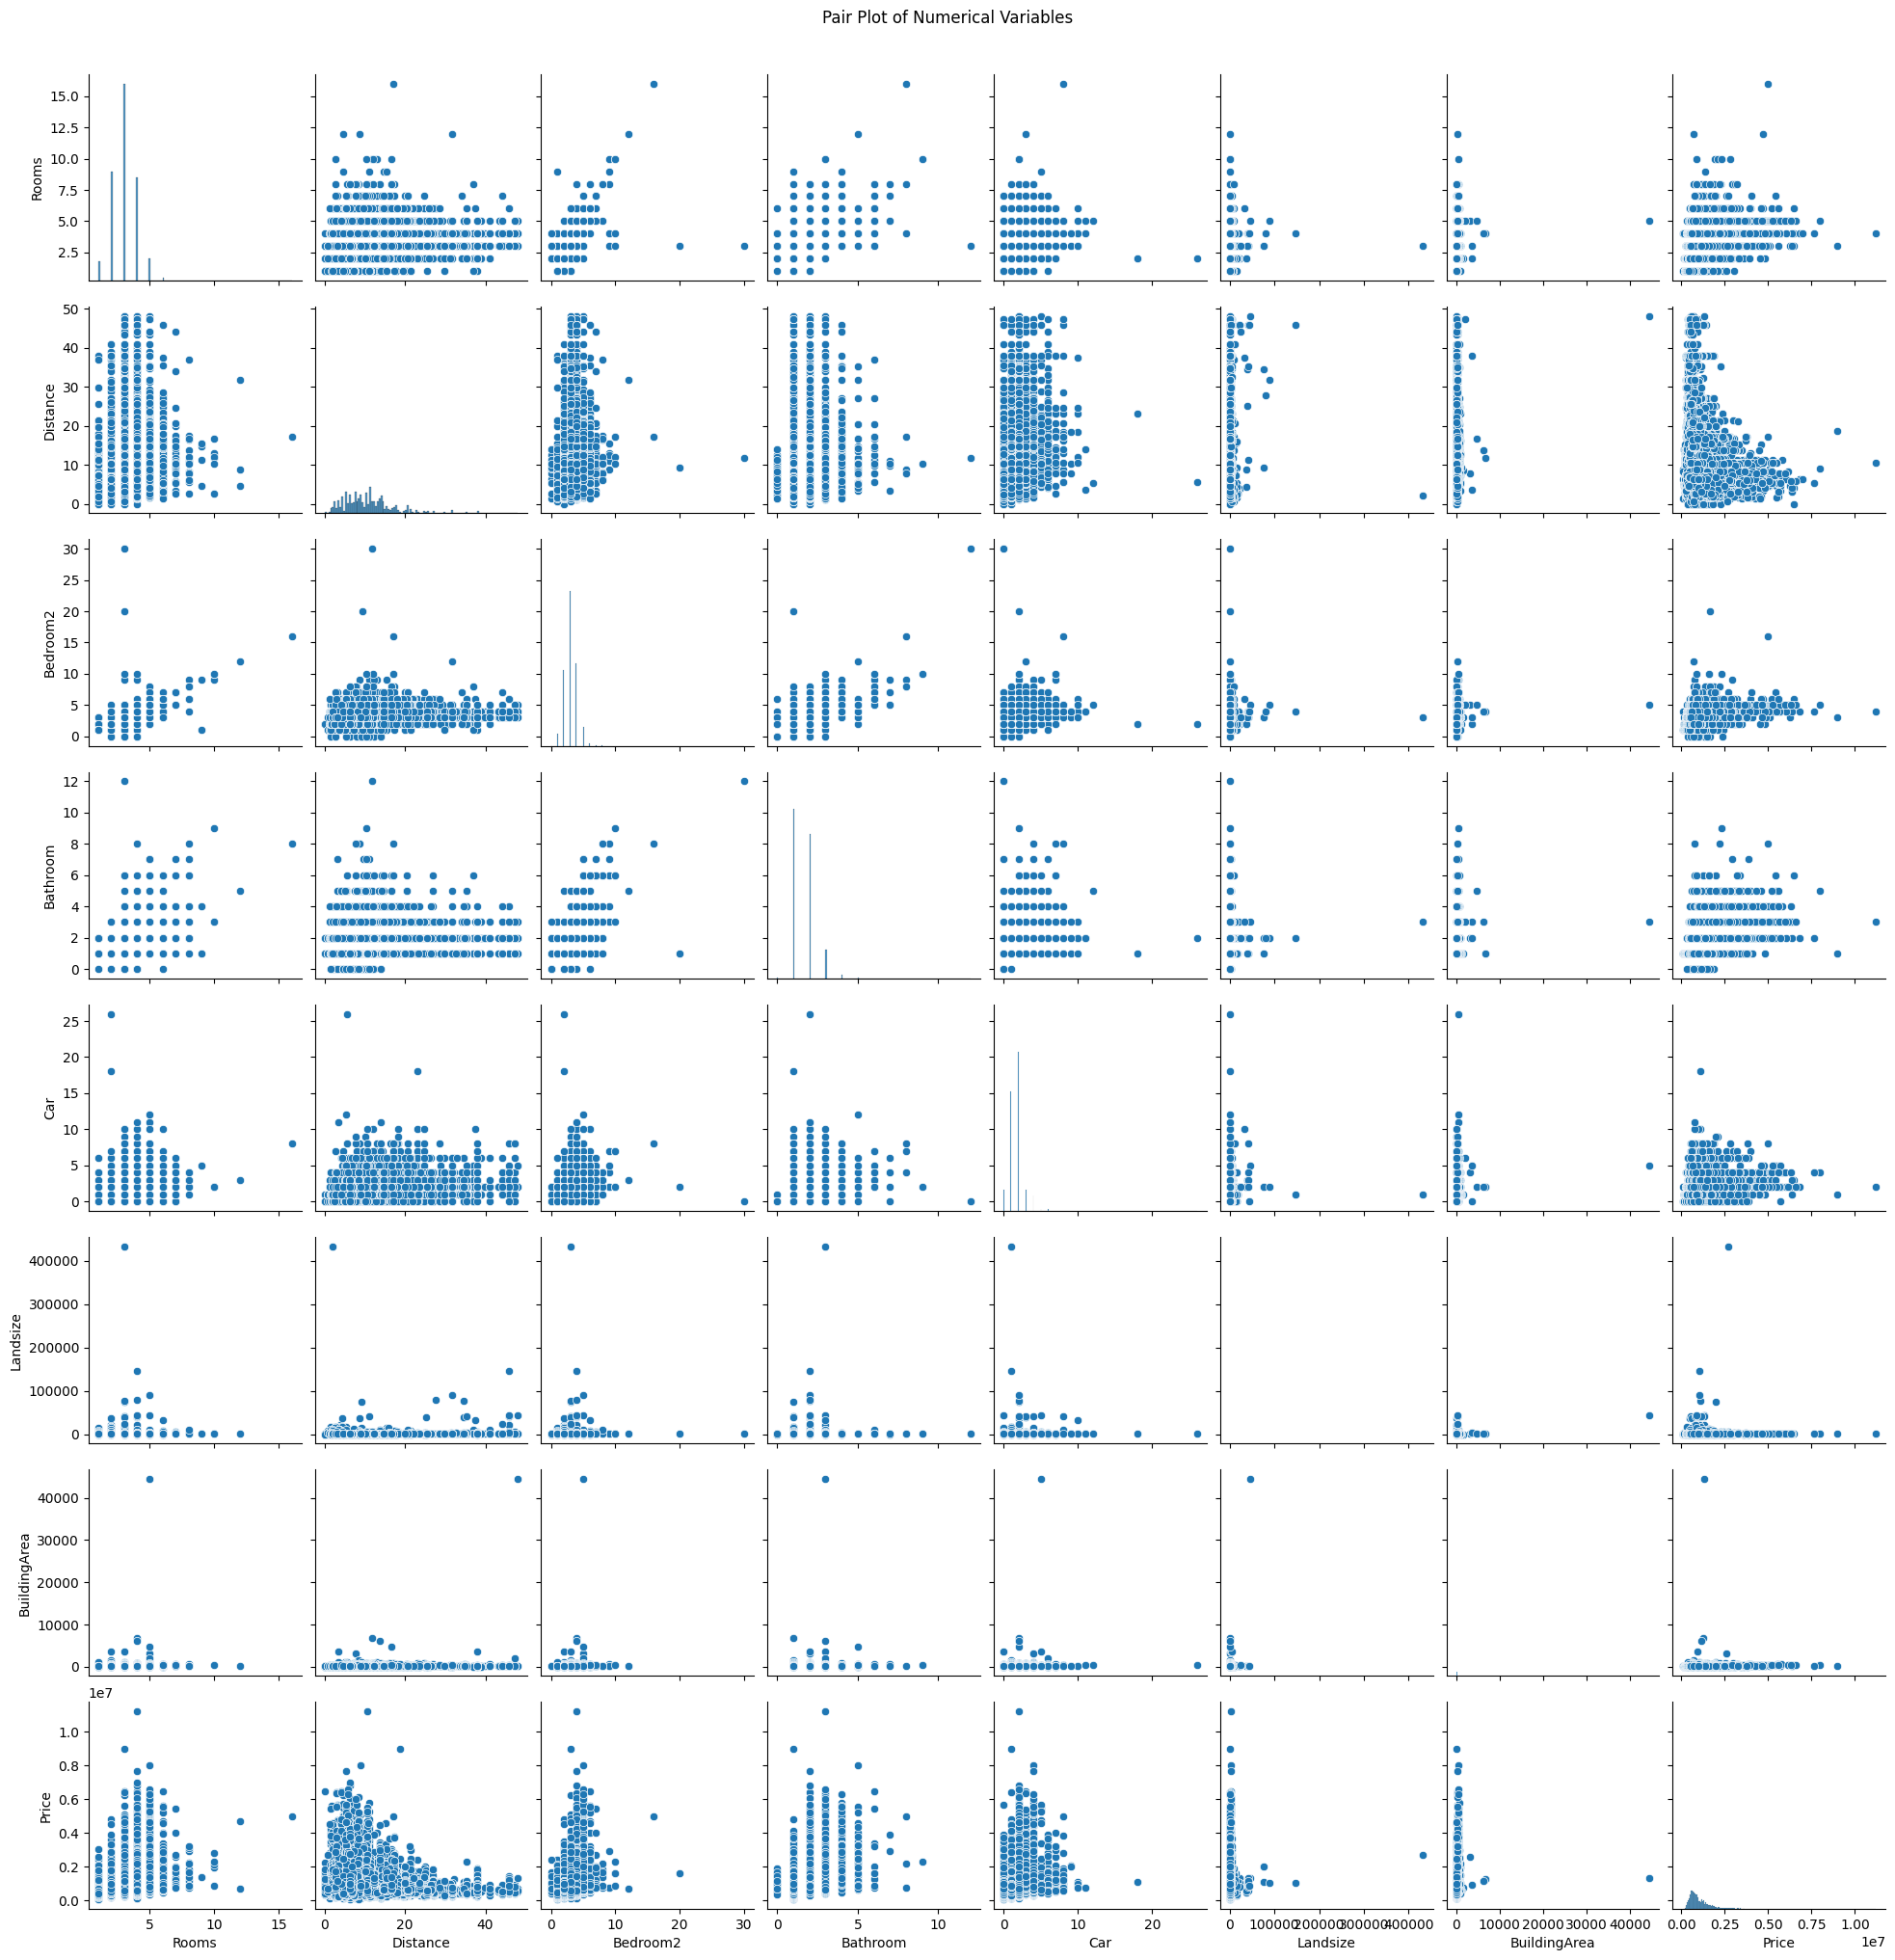

In [49]:
numeric_columns = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']

df_numeric = df[numeric_columns]


sns.pairplot(df_numeric)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

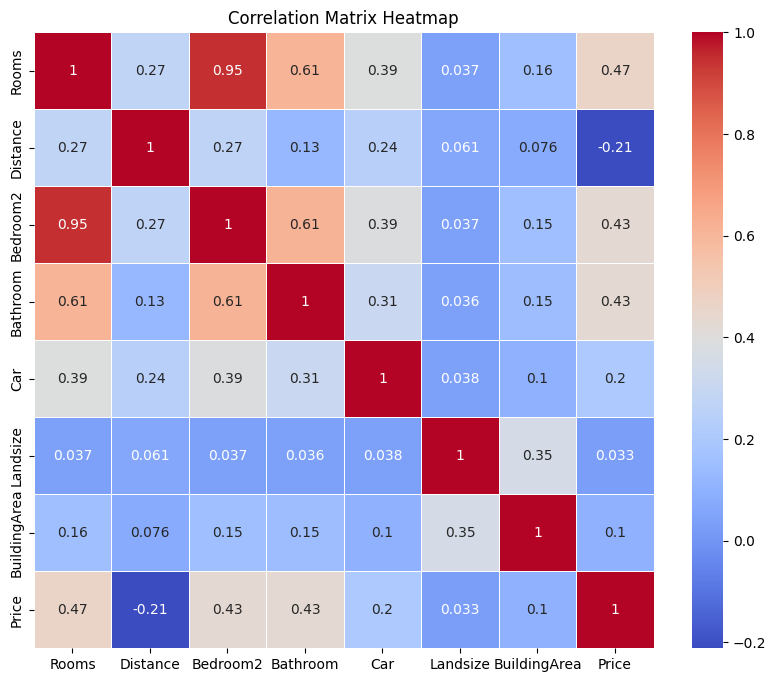

In [50]:
numeric_columns = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']

df_numeric = df[numeric_columns]


correlation_matrix = df_numeric.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [51]:


categorical_columns = ['Suburb', 'Method', 'Type', 'SellerG', 'Regionname', 'CouncilArea']

df_categorical = df[categorical_columns]

label_encoder = LabelEncoder()
for column in categorical_columns:
    df_categorical[column + '_encoded'] = label_encoder.fit_transform(df_categorical[column])

onehot_encoder = OneHotEncoder(drop='first', sparse=False)
df_onehot = pd.DataFrame(onehot_encoder.fit_transform(df_categorical.iloc[:, 6:]), columns=onehot_encoder.get_feature_names_out(df_categorical.columns[6:]))

df_encoded = pd.concat([df, df_onehot], axis=1)


df_encoded.drop(categorical_columns, axis=1, inplace=True)


print(df_encoded.head())


<ipython-input-51-0ffa786d6a90>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[column + '_encoded'] = label_encoder.fit_transform(df_categorical[column])
<ipython-input-51-0ffa786d6a90>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[column + '_encoded'] = label_encoder.fit_transform(df_categorical[column])
<ipython-input-51-0ffa786d6a90>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

              Address  Rooms      Price       Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  Suburb_encoded_1  Suburb_encoded_2  Suburb_encoded_3  Suburb_encoded_4  Suburb_encoded_5  Suburb_encoded_6  Suburb_encoded_7  Suburb_encoded_8  Suburb_encoded_9  Suburb_encoded_10  Suburb_encoded_11  Suburb_encoded_12  Suburb_encoded_13  Suburb_encoded_14  Suburb_encoded_15  Suburb_encoded_16  Suburb_encoded_17  \
0       68 Studley St      2        NaN  3/09/2016      2.50   3067.00      2.00      1.00 1.00    126.00           NaN        NaN     -37.80      145.00        4019.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00               0.00               0.00               0.00               0.00               0.00               0.00               0.00               0.00   
1        85 Turner St      2